In [2]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

In [63]:
class Data_augmentation(object):
    def __init__(self, img):
        self.img = img

    def crop(self):
        img_crop = self.img[0:100, 0:200]
        cv2.imshow('img_crop', img_crop)
        key = cv2.waitKey()
        if key == 27:
            cv2.destroyAllWindows()
        return img_crop
    
    def random_light_color(self):
    # brightness
        B, G, R = cv2.split(self.img)  
        b_rand = random.randint(-50, 50)
        if b_rand == 0:
            pass
        elif b_rand > 0:
            #让B这个矩阵（图像）中 凡是>lim的元素都赋值为255，
            #目的是怕 它们加上g_rand以后会超过255，就越界了
            #B[B > lim] 表示一个 保留大于lim的元素不变而把其他元素置为0的矩阵，
            #矩阵大小与B相同
            lim = 255 - b_rand              
            B[B > lim] = 255
            B[B <= lim] = (b_rand + B[B <= lim]).astype(self.img.dtype)
        elif b_rand < 0:
            lim = 0 - b_rand
            B[B < lim] = 0
            B[B >= lim] = (b_rand + B[B >= lim]).astype(self.img.dtype)
        
        g_rand = random.randint(-50, 50)
        if g_rand == 0:
            pass
        elif g_rand > 0:
            lim = 255 - g_rand
            G[G > lim] = 255
            G[G <= lim] = (g_rand + G[G <= lim]).astype(self.img.dtype)
        elif g_rand < 0:
            lim = 0 - g_rand
            G[G < lim] = 0
            G[G >= lim] = (g_rand + G[G >= lim]).astype(self.img.dtype)
    
        r_rand = random.randint(-50,50)
        if r_rand == 0:
            pass
        elif r_rand > 0:
            lim = 255 - r_rand
            R[R > lim] = 255
            R[R <= lim] = (r_rand + R[R <= lim]).astype(self.img.dtype)
        elif r_rand < 0:
            lim = 0 - r_rand
            R[R < lim] = 0
            R[R >= lim] = (r_rand + R[R >= lim]).astype(self.img.dtype)
    
        img_merge = cv2.merge((B, G, R))
        # img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
        return img_merge
    
    def random_color(self):
        img_random_color = self.random_light_color()
        cv2.imshow('img_random_color', img_random_color)
        cv2.imshow('img_ori', self.img)
        key = cv2.waitKey()
        if key == 27:
            cv2.destroyAllWindows()
        return img_random_color
    
    def adjust_gamma(self, gamma):
        # gamma校正之后，原来线性，变成曲线，拉伸关系
        invGamma = 1.0/gamma      
        table = []
        for i in range(256):
            table.append(((i / 255.0) ** invGamma) * 255)
        table = np.array(table).astype("uint8")
        return cv2.LUT(self.img, table)
    
    def brighter(self, gamma):
        img_brighter = self.adjust_gamma(gamma)
        cv2.imshow('img_ori', self.img)
        cv2.imshow('img_brighter', img_brighter)
        key = cv2.waitKey()
        if key == 27:
            cv2.destroyAllWindows()
        return img_brighter
    
    def histogram(self):
        plt.hist(self.img.flatten(), 256, [0, 256], color = 'r')
        img_yuv = cv2.cvtColor(self.img, cv2.COLOR_BGR2YUV)
        # equalize the histogram of the Y channel
        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])    # only for 1 channel
        #cv2.imshow('img_yuv', img_yuv)         img_yuv y:明亮度 u:色度 v:饱和度
        #Y, U, V = cv2.split(img_yuv)
        #cv2.imshow('Y', Y)
        #cv2.imshow('U', U)
        #cv2.imshow('V', V)
        # convert the YUV image back to RGB format
        img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)  # y:luminance(明亮度)， u&v: 色度饱和度
        cv2.imshow('Color imput image', self.img)
        cv2.imshow('Histogram equalized', img_output)
        key = cv2.waitKey()
        if key == 27:
            cv2.destroyAllWindows()
        return img_output
    
    def rotation(self, angle):
        M = cv2.getRotationMatrix2D((self.img.shape[1] / 2, self.img.shape[0] / 2), angle, 1)
        # center, angle, scale
        img_rotate = cv2.warpAffine(self.img, M, (self.img.shape[1], self.img.shape[0]))
        cv2.imshow('rotated lenna', img_rotate)
        key = cv2.waitKey()
        if key == 27:
            cv2.destroyAllWindows()
        return img_rotate
    
    def similarity_transform(self, angle, scale):
        M = cv2.getRotationMatrix2D((self.img.shape[1] / 2, self.img.shape[0] / 2), angle, scale)
        # center, angle, scale
        img_similarity = cv2.warpAffine(self.img, M, (self.img.shape[1], self.img.shape[0]))
        cv2.imshow('rotated lenna', img_similarity)
        key = cv2.waitKey()
        if key == 27:
            cv2.destroyAllWindows()
        return img_similarity
    
    def affine_transform(self):
        rows, cols, ch = self.img.shape
        pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows-1]])
        pts2 = np.float32([[cols * 2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols *0.1, rows * 0.9]])

        M = cv2.getAffineTransform(pts1, pts2)
        dst = cv2.warpAffine(self.img, M, (cols, rows))

        cv2.imshow('affine lenna', dst)
        key = cv2.waitKey()
        if key == 27:
            cv2.destroyAllWindows()
        return dst
    
    def random_warp(self, row, col):
        height, width, channels = self.img.shape
    
        #warp:
        random_margin = 60
        x1 = random.randint(-random_margin, random_margin)
        y1 = random.randint(-random_margin, random_margin)
        x2 = random.randint(width - random_margin - 1, width - 1)
        y2 = random.randint(-random_margin, random_margin)
        x3 = random.randint(width - random_margin - 1, width - 1)
        y3 = random.randint(height - random_margin - 1, height - 1)
        x4 = random.randint(-random_margin, random_margin)
        y4 = random.randint(height - random_margin - 1, height - 1)

        dx1 = random.randint(-random_margin, random_margin)
        dy1 = random.randint(-random_margin, random_margin)
        dx2 = random.randint(width - random_margin - 1, width - 1)
        dy2 = random.randint(-random_margin, random_margin)
        dx3 = random.randint(width - random_margin - 1, width - 1)
        dy3 = random.randint(height - random_margin - 1, height - 1)
        dx4 = random.randint(-random_margin, random_margin)
        dy4 = random.randint(height - random_margin - 1, height - 1)

        pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
        pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
        M_warp = cv2.getPerspectiveTransform(pts1, pts2)
        img_warp = cv2.warpPerspective(img, M_warp, (width, height))
        return M_warp, img_warp
    
    def random_perspective_transform(self):
        M_warp, img_warp = self.random_warp(self.img.shape[0], self.img.shape[1])
        cv2.imshow('lenna_warp', img_warp)
        key = cv2.waitKey()
        if key == 27:
            cv2.destroyAllWindows()
        return img_warp
      

In [64]:
img = cv2.imread('D:\pythonworkplace\AI_CV\week0\Lenna.png')
cv2.imshow('lenna',img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
img_augmentation = Data_augmentation(img)

In [65]:
crop = img_augmentation.crop()
print(crop.shape)
print(crop)

(100, 200, 3)
[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [104 105 211]
  [ 92 101 211]
  [105 109 207]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [104 105 211]
  [ 92 101 211]
  [105 109 207]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [104 105 211]
  [ 92 101 211]
  [105 109 207]]

 ...

 [[ 79  64 177]
  [ 79  64 177]
  [ 74  58 163]
  ...
  [107 109 198]
  [124 121 199]
  [108 109 210]]

 [[ 79  63 169]
  [ 79  63 169]
  [ 74  53 159]
  ...
  [121 118 206]
  [103 109 213]
  [108  98 203]]

 [[ 74  55 166]
  [ 74  55 166]
  [ 71  51 154]
  ...
  [112 123 211]
  [104 100 205]
  [120 103 195]]]


In [66]:
img_random_color = img_augmentation.random_color()
print(img_random_color.shape)
print(img_random_color)

(512, 512, 3)
[[[ 87 136 185]
  [ 87 136 185]
  [ 95 136 182]
  ...
  [ 84 147 189]
  [ 72 129 180]
  [ 52  98 159]]

 [[ 87 136 185]
  [ 87 136 185]
  [ 95 136 182]
  ...
  [ 84 147 189]
  [ 72 129 180]
  [ 52  98 159]]

 [[ 87 136 185]
  [ 87 136 185]
  [ 95 136 182]
  ...
  [ 84 147 189]
  [ 72 129 180]
  [ 52  98 159]]

 ...

 [[ 22  17  43]
  [ 22  17  43]
  [ 20  26  51]
  ...
  [ 46  72 132]
  [ 38  67 131]
  [ 41  61 136]]

 [[ 19  21  41]
  [ 19  21  41]
  [ 24  31  55]
  ...
  [ 41  69 138]
  [ 43  70 140]
  [ 43  73 144]]

 [[ 19  21  41]
  [ 19  21  41]
  [ 24  31  55]
  ...
  [ 41  69 138]
  [ 43  70 140]
  [ 43  73 144]]]


In [67]:
img_brighter = img_augmentation.brighter(2)
print(img_brighter.shape)
print(img_brighter)

(512, 512, 3)
[[[178 186 240]
  [178 186 240]
  [184 186 238]
  ...
  [176 194 242]
  [167 182 237]
  [151 158 225]]

 [[178 186 240]
  [178 186 240]
  [184 186 238]
  ...
  [176 194 242]
  [167 182 237]
  [151 158 225]]

 [[178 186 240]
  [178 186 240]
  [184 186 238]
  ...
  [176 194 242]
  [167 182 237]
  [151 158 225]]

 ...

 [[123  67 146]
  [123  67 146]
  [121  82 153]
  ...
  [146 136 210]
  [139 131 209]
  [141 125 212]]

 [[120  74 144]
  [120  74 144]
  [125  90 156]
  ...
  [141 133 213]
  [143 134 214]
  [143 137 217]]

 [[120  74 144]
  [120  74 144]
  [125  90 156]
  ...
  [141 133 213]
  [143 134 214]
  [143 137 217]]]


(512, 512, 3)
[[[165 177 255]
  [165 177 255]
  [174 177 255]
  ...
  [163 191 255]
  [142 162 253]
  [ 88  98 199]]

 [[165 177 255]
  [165 177 255]
  [174 177 255]
  ...
  [163 191 255]
  [142 162 253]
  [ 88  98 199]]

 [[165 177 255]
  [165 177 255]
  [174 177 255]
  ...
  [163 191 255]
  [142 162 253]
  [ 88  98 199]]

 ...

 [[ 25   0  50]
  [ 25   0  50]
  [ 31   0  65]
  ...
  [ 68  57 158]
  [ 57  49 153]
  [ 59  40 156]]

 [[ 23   0  49]
  [ 23   0  49]
  [ 38  10  73]
  ...
  [ 64  54 163]
  [ 66  56 166]
  [ 68  60 172]]

 [[ 23   0  49]
  [ 23   0  49]
  [ 38  10  73]
  ...
  [ 64  54 163]
  [ 66  56 166]
  [ 68  60 172]]]


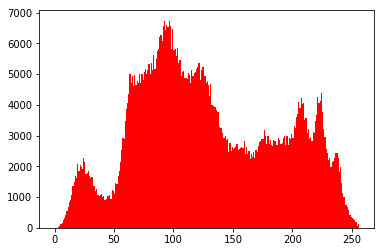

In [69]:
img_histogram = img_augmentation.histogram()
print(img_histogram.shape)
print(img_histogram)

In [70]:
img_rotate = img_augmentation.rotation(50)
print(img_rotate.shape)
print(img_rotate)

(512, 512, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [71]:
img_similarity = img_augmentation.similarity_transform(50, 1.5)
print(img_similarity.shape)
print(img_similarity)

(512, 512, 3)
[[[ 89  97 205]
  [ 87  95 203]
  [ 91  96 204]
  ...
  [127 139 205]
  [128 146 210]
  [130 153 215]]

 [[ 94  96 204]
  [ 89  96 207]
  [ 92  96 208]
  ...
  [126 141 208]
  [126 146 213]
  [128 154 217]]

 [[101  96 201]
  [ 97  97 203]
  [ 92  96 206]
  ...
  [127 147 209]
  [126 151 214]
  [127 157 217]]

 ...

 [[ 72  61 170]
  [ 75  61 168]
  [ 72  59 167]
  ...
  [ 86  94 213]
  [ 90  96 213]
  [ 94  95 214]]

 [[ 74  60 171]
  [ 74  63 170]
  [ 73  63 168]
  ...
  [ 82  90 213]
  [ 85  92 214]
  [ 90  92 215]]

 [[ 75  60 170]
  [ 74  63 169]
  [ 75  66 169]
  ...
  [ 84  91 213]
  [ 85  92 215]
  [ 92  94 215]]]


In [72]:
img_affine = img_augmentation.affine_transform()
print(img_affine.shape)
print(img_affine)

(512, 512, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [73]:
img_perspective = img_augmentation.random_perspective_transform()
print(img_perspective.shape)
print(img_perspective)

(512, 512, 3)
[[[102 133 235]
  [ 99 137 235]
  [100 137 235]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[101 131 232]
  [ 97 135 233]
  [101 136 235]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[102 131 232]
  [ 99 133 232]
  [105 137 233]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
